In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
import matplotlib.pyplot as plt
from keras.utils.data_utils import get_file
#from keras.utils import print_summary
import numpy as np
import random
import sys
import io

In [2]:
# at this point the representation is (4, 4, 8) i.e. 128-dimensional
input_txt = Input(shape=(256, 1, 1))
print(np.shape(input_txt))

x = Conv2D(256, (3, 3), data_format='channels_first', activation='relu', padding='same')(input_txt)
print(np.shape(x))#(?, 128, 1, 1)
x = UpSampling2D((2, 2), data_format='channels_first')(x)
print(np.shape(x))#(?, 64, 4, 4)
x = Conv2D(128, (3, 3), data_format='channels_first', activation='relu', padding='same')(x)
print(np.shape(x))#(?, 64, 4, 4)
x = UpSampling2D((2, 2), data_format='channels_first')(x)
print(np.shape(x))#(?, 64, 8, 8)
x = Conv2D(64, (3, 3), data_format='channels_first', activation='relu', padding='same')(x)
print(np.shape(x))#(?, 64, 4, 4)
x = UpSampling2D((2, 2), data_format='channels_first')(x)
print(np.shape(x))#(?, 64, 8, 8)

x = Conv2D(32, (3, 3), data_format='channels_first', activation='relu', padding='same')(x)
print(np.shape(x))#(?, 32, 8, 8)
x = UpSampling2D((2, 2), data_format='channels_first')(x)
print(np.shape(x))#(?, 32, 16, 16)
x = Conv2D(16, (3, 3), data_format='channels_first', activation='relu')(x)
print(np.shape(x))#(?, 16, 14, 14)
x = UpSampling2D((2, 2), data_format='channels_first')(x)
print(np.shape(x))#(?, 16, 28, 28)
x = Conv2D(8, (3, 3), data_format='channels_first', activation='relu')(x)
print(np.shape(x))#(?, 16, 14, 14)
x = UpSampling2D((2, 2), data_format='channels_first')(x)
print(np.shape(x))#(?, 16, 28, 28)

decoded = Conv2D(3, (3, 3), data_format='channels_first', activation='sigmoid', padding='same')(x)
print(np.shape(decoded))#(?, 1, 28, 28)

print('--------------')

x = Conv2D(8, (3, 3), data_format='channels_first', activation='relu', padding='same')(decoded)
print(np.shape(x))  # (?, 16, 28, 28)
x = MaxPooling2D((2, 2), data_format='channels_first', padding='same')(x)
print(np.shape(x))  # (?, 16, 14, 14)
x = Conv2D(16, (3, 3), data_format='channels_first', activation='relu', padding='same')(x)
print(np.shape(x))#(?, 16, 28, 28)
x = MaxPooling2D((2, 2), data_format='channels_first', padding='same')(x)
print(np.shape(x))#(?, 16, 14, 14)

x = Conv2D(32, (3, 3), data_format='channels_first', activation='relu', padding='same')(x)
print(np.shape(x))  # (?, 32, 14, 14)
x = MaxPooling2D((2, 2), data_format='channels_first', padding='same')(x)
print(np.shape(x))  # (?, 32, 7, 7)
x = Conv2D(64, (3, 3), data_format='channels_first', activation='relu', padding='same')(x)
print(np.shape(x))#(?, 32, 14, 14)
x = MaxPooling2D((2, 2), data_format='channels_first', padding='same')(x)
print(np.shape(x))#(?, 32, 7, 7)
x = Conv2D(128, (3, 3), data_format='channels_first', activation='relu', padding='same')(x)
print(np.shape(x))#(?, 64, 7, 7)
x = MaxPooling2D((2, 2), data_format='channels_first', padding='same')(x)
print(np.shape(x))#(?, 32, 7, 7)

x = Conv2D(256, (3, 3), data_format='channels_first', activation='relu', padding='same')(x)
print(np.shape(x))
encoded = MaxPooling2D((2, 2), data_format='channels_first', padding='same')(x)
print(np.shape(encoded))#(?, 128, 1, 1)

autoencoder_txt = Model(input_txt, encoded)
autoencoder_txt2 = Model(input_txt, decoded)
autoencoder_txt_input = Model(input_txt, input_txt)
autoencoder_txt.compile(optimizer='adadelta', loss='binary_crossentropy')

with io.open('./000111.txt', 'r') as f:
    text = f.read().split('\n')
print('corpus length:', len(text))
text = [float(i) for i in text]
#print(text)
maxlen = 256
sentences = []
for i in range(0, len(text) - maxlen):
    sentences.append(text[i: i + maxlen])
print('nb sequences:', len(sentences))
#print(sentences)

x = np.zeros((len(sentences), maxlen, 1), float)
for i, sentence in enumerate(sentences):
    for j, char in enumerate(sentence):
        x[i, j, 0] = char
        x_train = np.reshape(x, (len(sentences), maxlen, 1, 1))

from keras.callbacks import CSVLogger, LambdaCallback


decoded_imgs = autoencoder_txt2.predict(x_train)

#n = 1
#plt.figure(figsize=(1, 1))
#for i in range(n):

    #ax = plt.subplot(2, n, i + 1 + n)
    #plt.imshow(decoded_imgs[i].reshape(52, 52))
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
#plt.show()

loss_history = []
out_imgs_t = []

(None, 256, 1, 1)
(None, 256, 1, 1)
(None, 256, 2, 2)
(None, 128, 2, 2)
(None, 128, 4, 4)
(None, 64, 4, 4)
(None, 64, 8, 8)
(None, 32, 8, 8)
(None, 32, 16, 16)
(None, 16, 14, 14)
(None, 16, 28, 28)
(None, 8, 26, 26)
(None, 8, 52, 52)
(None, 3, 52, 52)
--------------
(None, 8, 52, 52)
(None, 8, 26, 26)
(None, 16, 26, 26)
(None, 16, 13, 13)
(None, 32, 13, 13)
(None, 32, 7, 7)
(None, 64, 7, 7)
(None, 64, 4, 4)
(None, 128, 4, 4)
(None, 128, 2, 2)
(None, 256, 2, 2)
(None, 256, 1, 1)
corpus length: 384
nb sequences: 128


Epoch 1/1000
1000/1000 [==============================] - 24s 22ms/step - loss: 3.0176
Reconstructed Images


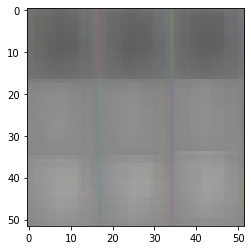

Epoch 2/1000
1000/1000 [==============================] - 0s 25us/step - loss: 2.8722


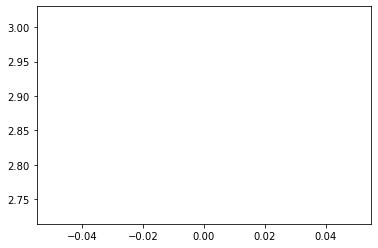

In [3]:
def on_epoch_end(epoch, loss):
    if epoch % 200 == 0:
        loss_float = [v for v in loss.values()]
        loss_float = round(float(loss_float[0]), 4)
        loss_history.append(loss_float)

        decoded_imgs = autoencoder_txt2.predict(x_train)

        n = 1
        canvas_orig = np.empty((52 * n, 52 * n, 3))
        canvas_recon = np.empty((52 * n, 52 * n, 3))
        for i in range(n):
            #Encode and decode the image
            g = decoded_imgs
            #Display reconstructed images
            for j in range(n):
                #Draw the reconstructed image
                canvas_recon[i * 52:(i + 1) * 52, j * 52:(j + 1) * 52] = \
                    g[j].reshape([52, 52, 3])

            print("Reconstructed Images")
        #plt.figure(figsize=(n, n))
        plt.imshow(canvas_recon, origin="upper", cmap="gray")
        #plt.savefig('across/epoch {} loss {}.png'.format(epoch, loss_float))
        plt.show()

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

autoencoder_txt.fit(x_train, x_train,
                epochs=1000,
                batch_size=128,
                shuffle=True,
                steps_per_epoch=1000,
                callbacks=[print_callback])

#encoded_imgs = autoencoder1.predict(x_train)

#n = 10
#plt.figure(figsize=(10, 4))
#for i in range(n):
    #ax = plt.subplot(1, n, i + 1)
    #plt.imshow(encoded_imgs[i].reshape(1, 1 * 128).T)
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
#plt.show()

out_imgs = autoencoder_txt.predict(x_train)
#out_imgs_t.append(out_imgs)
#out_imgs_f = open('across/out_imgs_t.txt', 'w')
#out_imgs_f.write(str(out_imgs_t))
#out_imgs_f.close()
n = 1
plt.figure(figsize=(1, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(out_imgs[i].reshape(1, 1 * 256).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

#input_imgs = autoencoder_txt_input.predict(x_train)

#n = 10
#plt.figure(figsize=(10, 4))
#for i in range(n):
    #ax = plt.subplot(1, n, i + 1)
    #plt.imshow(input_imgs[i].reshape(1, 1 * 256).T)
    #plt.gray()
    #ax.get_xaxis().set_visible(False)
    #ax.get_yaxis().set_visible(False)
#plt.show()

plt.plot(loss_history)
plt.show()